In [19]:
import os
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
spotify_df = pd.read_csv('/Users/anikasethi/Desktop/train_dataset.csv')
# features to train on (need to be normalized)
train_features = ['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'time_signature']
spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [22]:
# abridged df with training features (need to normalize them)
spotify_df_train_abridged = spotify_df[train_features]
#instance of standard scaler
scaler = StandardScaler()
# fit_transform = (1) fit using mean and std (2) applies standardization formula on each value
df_scaled = scaler.fit_transform(spotify_df_train_abridged)

# copy original df 
spotify_normalized_df = spotify_df.copy()
# update train_features
spotify_normalized_df[train_features] = df_scaled

spotify_df_train = spotify_normalized_df[['id'] + train_features]
spotify_df_train.head()

,id,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,-1.174160,-0.214754,0.490096,-0.385182,-1.483654,-0.615393,0.719665,1.924128,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842
1,021ht4sdgPcrDgSk7JTbKY,-1.500768,-0.214754,0.791115,-1.107625,-1.483654,-2.344110,0.719665,4.736917,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724
2,07A5yehtSnoedViJAZkNnc,-1.500768,-0.214754,-0.780204,-1.449000,-1.199517,-2.156266,0.719665,-0.298309,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040
3,08FmqUhxtyLTn6pAh6bk45,-1.500768,-0.214754,-1.460507,-1.776084,0.505310,-3.488663,0.719665,-0.302756,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842
4,08y9GfoqCWfOGsKdwojr5e,-1.500768,-0.214754,-0.972856,-1.524420,-0.631241,-1.315289,-1.389536,-0.366127,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599


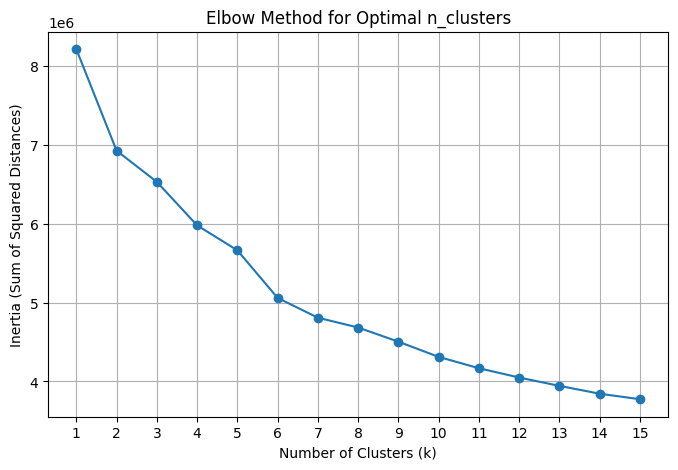

In [25]:
# elbow method 
inertia = []

# try the following cluster values
cluster_range = range(1, 16)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(spotify_df_train[train_features])
    inertia.append(kmeans.inertia_)

# plot inertia values to pick
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [26]:
# n_clusters picked using elbow method
kmeans = KMeans(n_clusters=6, random_state=42)
# fit k-means to normalized data
kmeans.fit(spotify_df_train[train_features])
# add cluster labels
spotify_normalized_df['cluster'] = kmeans.labels_

In [27]:
# testing data
spotify_df_test = pd.read_csv('/Users/anikasethi/Desktop/test_dataset.csv')
# Normalize the new dataset using the same scaler
test_dataset_features = spotify_df_test[train_features]
new_dataset_scaled = scaler.transform(test_dataset_features)

# Predict clusters for the new dataset
new_dataset_scaled['cluster'] = kmeans.predict(new_dataset_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices